In [1]:
import numpy as np
from sympy import Symbol
import roboticstoolbox as rtb
from scipy.optimize import fsolve
from delta_robot import DeltaRobot
import matplotlib.pyplot as plt

# importing plotly for plotting
import plotly.graph_objects as go

# Path generation using De- Casteljau's algorithm

In [9]:
r = 200
h = 300
s = 140
k = 500
Zt = 0
robot = DeltaRobot(r, h, s, k, Zt)

def lerp(P1, P2, t):
    return P1*(1- t)+ P2*(t)

def generate_spline(start_point, cp_1, cp_2, end_point):
    # start_point, cp_1, cp_2, end_point are all 3D points
    # return a list of 3D points
    spline = []
    for t in np.linspace(0, 1, 100):
        P1 = lerp(start_point, cp_1, t)
        P2 = lerp(cp_1, cp_2, t)
        P3 = lerp(cp_2, end_point, t)
        P4 = lerp(P1, P2, t)
        P5 = lerp(P2, P3, t)
        P6 = lerp(P4, P5, t)
        spline.append(P6)
    return spline


In [22]:
P0 = np.array([0, 0, -347])
P1 = np.array([0, 0, -200])
P2 = np.array([10, 100, -200])
P3 = np.array([10, 150, -347])

spline = generate_spline(P0, P1, P2, P3)

x, y, z = map(list, zip(*spline))

theta_space = []
for i in range(len(spline)):
    theta_space.append(robot.calculate_inv_kinematics(spline[i][0], spline[i][1], spline[i][2]))

# PLot sample points in the spline
sample_spl_points = []

for i in np.arange(0, 100, 10):
    sample_spl_points.append(spline[i])

x_s, y_s, z_s = map(list, zip(*sample_spl_points))

# Plot P in 3D using plotly
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='lines')])
fig.add_trace(go.Scatter3d(x=x_s, y=y_s, z=z_s, mode='markers', marker=dict(size=2, color='red')))
#fig.update_layout(scene=dict(xaxis = dict(range=[-200, 200],),yaxis = dict(range=[-200, 200],),zaxis = dict(range=[-400, 0],),))
fig.show()

## Change in Joint Angles with respect to path parameter

In [25]:
# get theta1, theta2 and theta3 from theta_space(a nested list)
theta_1, theta_2, theta_3 = map(list, zip(*theta_space))


# PLotting theta_space vs t for each angles
t = np.linspace(0, 1, 100)

# Plot theta for corresponding sample spline points
t_s = [t[i] for i in np.arange(0, 100, 10)]
theta_1_s = [theta_1[i] for i in np.arange(0, 100, 10)]
theta_2_s = [theta_2[i] for i in np.arange(0, 100, 10)]
theta_3_s = [theta_3[i] for i in np.arange(0, 100, 10)]


fig = go.Figure()
fig.add_trace(go.Scatter( y = theta_1, x = t, name = 'J1'))
fig.add_trace(go.Scatter(y = theta_2, x = t, name = 'J2'))
fig.add_trace(go.Scatter(y = theta_3, x = t, name = 'J3'))

fig.add_trace(go.Scatter(y = theta_1_s, x = t_s, name = 'J1_sample', mode = 'markers'))
fig.add_trace(go.Scatter(y = theta_2_s, x = t_s, name = 'J2_sample', mode = 'markers'))
fig.add_trace(go.Scatter(y = theta_3_s, x = t_s, name = 'J3_sample', mode = 'markers'))

fig.update_layout(title = 'Theta vs parameter t', xaxis_title = 'Parameter t', yaxis_title = 'Angle')
fig.show()

In [17]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [2]:
import pandas as pd

In [7]:
coordinates = pd.read_csv('gcode.csv', header = None)

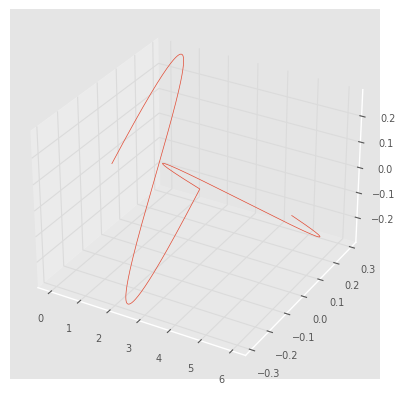

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cubic_bezier(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

def plot_bezier_curve(P0, P1, P2, P3):
    t = np.linspace(0, 1, num=500)
    curve = np.array([cubic_bezier(t[i], P0, P1, P2, P3) for i in range(len(t))])
    return curve

# Define your points in 3D space
P0 = np.array([0, 0, 0])
P1 = np.array([1, 1, 1])
P2 = np.array([2, -1, -1])
P3 = np.array([3, 0, 0])

curve1 = plot_bezier_curve(P0, P1, P2, P3)

# Now, define new control points for the second curve
P4 = np.array([4, -1, 1])
P5 = np.array([5, 1, -1])
P6 = np.array([6, 0, 0])

# Use P3 as starting point and P4,P5,P6 as control and end points
curve2 = plot_bezier_curve(P3, P4, P5, P6)

# Combine both curves
total_curve = np.concatenate((curve1, curve2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(total_curve[:, 0], total_curve[:, 1], total_curve[:, 2])

plt.show()
